In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_df = pd.read_csv("data/clean_train_df_ext.csv")
test_df = pd.read_csv("data/clean_final_test_df.csv")

In [3]:
test_df

,id,user_name,timestamp_post,num_like_post,num_comment_post,num_share_post,month_post,day_post,weekday_post,hour_post,...,T,Nb,X,I,B,Y,Ni,sentiment,num_tag,num_emoji
0,6015,fbf39587d668e9ae28afb00b8fc00570,2020-05-22 15:57:19,-999.0,-999.0,-999.0,5.0,22.0,4.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1,6016,c4acc2118bdcdb5770565362b02d00e0,2020-04-10 06:29:45,4.0,-999.0,-999.0,4.0,10.0,4.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,6017,180dd4930112053803ccea8556f33e47,2020-06-14 02:30:28,963.0,50.0,6.0,6.0,14.0,6.0,2.0,...,0,0,0,0,0,0,0,-1,0,0
3,6018,ac4d365f23909091fab2552bdc54f5ef,2020-08-01 04:21:00,-999.0,-999.0,-999.0,8.0,1.0,5.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,6019,5ba5638b734e397d5263a6b1b9201abd,2020-04-21 09:37:52,5.0,3.0,-999.0,4.0,21.0,1.0,9.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,7656,4b3099585793c94c549f4a2fda9c8709,2020-04-06 04:48:36,14029.0,50.0,142.0,4.0,6.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1642,7657,ccf2286e41cd4654a445f605a17a621f,2020-03-12 01:59:13,-999.0,-999.0,0.0,3.0,12.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1643,7658,37e84ae817d024d201b8478236d9117f,2020-05-23 07:57:01,-999.0,-999.0,48.0,5.0,23.0,5.0,7.0,...,0,1,0,0,0,0,0,-1,0,0
1644,7659,f3317e52aa79b261db534a38e7f7c360,2020-06-17 04:11:22,-999.0,50.0,155.0,6.0,17.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df = train_df.drop(['user_name', 'clean_post_message', 'timestamp_post'], axis=1)
test_df = test_df.drop(['user_name', 'clean_post_message', 'timestamp_post'], axis=1)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5172 non-null   int64  
 1   num_like_post              5172 non-null   float64
 2   num_comment_post           5172 non-null   float64
 3   num_share_post             5172 non-null   float64
 4   label                      5172 non-null   int64  
 5   num_post                   5172 non-null   int64  
 6   month_post                 5172 non-null   float64
 7   day_post                   5172 non-null   float64
 8   weekday_post               5172 non-null   float64
 9   hour_post                  5172 non-null   float64
 10  session_of_day             5172 non-null   int64  
 11  len_post_message           5172 non-null   int64  
 12  num_url_in_post_message    5172 non-null   int64  
 13  num_phone_in_post_message  5172 non-null   int64

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1646 non-null   int64  
 1   num_like_post              1646 non-null   float64
 2   num_comment_post           1646 non-null   float64
 3   num_share_post             1646 non-null   float64
 4   month_post                 1646 non-null   float64
 5   day_post                   1646 non-null   float64
 6   weekday_post               1646 non-null   float64
 7   hour_post                  1646 non-null   float64
 8   session_of_day             1646 non-null   int64  
 9   len_post_message           1646 non-null   int64  
 10  num_url_in_post_message    1646 non-null   int64  
 11  num_phone_in_post_message  1646 non-null   int64  
 12  num_bold_char_in_message   1646 non-null   int64  
 13  num_upper_char             1646 non-null   int64

In [7]:
kf = KFold(n_splits=5)

In [8]:
X_train = train_df.drop(['label', 'id'], axis=1).values
y_train = train_df['label'].values

In [9]:
X_test = test_df.drop(['id'], axis=1).values

In [10]:
X_train.shape, y_train.shape, X_test.shape

((5172, 47), (5172,), (1646, 47))

## Random Forest

In [26]:
random_states = [0, 1231231, 96596565]
history = []
y_test_pred = np.zeros((1646, ))
# for random_state in random_states:
for (i, (train_idx, val_idx)) in enumerate(kf.split(X_train)):
    tree_clf = RandomForestClassifier(n_estimators=100, 
                                     random_state=1111, 
                                    max_depth=3)
#     Toggle function for KNn :)
#     clf =  KNeighborsClassifier(n_neighbors=5)

    X_train_kf, X_val_kf = X_train[train_idx], X_train[val_idx]
    y_train_kf, y_val_kf = y_train[train_idx], y_train[val_idx]

#     clf = RandomForestClassifier(max_depth=5, random_state=0)
    tree_clf.fit(X_train_kf, y_train_kf)

    importances = tree_clf.feature_importances_

    y_pred = tree_clf.predict_proba(X_val_kf)[:, 1]

    y_test_pred += tree_clf.predict_proba(X_test)[:, 1]

#     print(y_val_kf)
#     print(y_pred[:, 1])

    roc_score = roc_auc_score(y_val_kf, y_pred)
    history.append(roc_score)
    print("Fold ", i, ": ", roc_score)

Fold  0 :  0.8711723909111341
Fold  1 :  0.8813564927505557
Fold  2 :  0.8888279021230171
Fold  3 :  0.855135920702055
Fold  4 :  0.8391595585076035


In [22]:
np.array(history).mean(), np.sqrt(np.array(history).var())

(0.8671304529988731, 0.01797629834676201)

## KNn

In [23]:
random_states = [0, 1231231, 96596565]
history = []
y_test_pred = np.zeros((1646, ))
# for random_state in random_states:
for (i, (train_idx, val_idx)) in enumerate(kf.split(X_train)):

    clf =  KNeighborsClassifier(n_neighbors=5)

    X_train_kf, X_val_kf = X_train[train_idx], X_train[val_idx]
    y_train_kf, y_val_kf = y_train[train_idx], y_train[val_idx]

#     clf = RandomForestClassifier(max_depth=5, random_state=0)
    clf.fit(X_train_kf, y_train_kf)

    y_pred = clf.predict_proba(X_val_kf)[:, 1]

    y_test_pred += clf.predict_proba(X_test)[:, 1]

#     print(y_val_kf)
#     print(y_pred[:, 1])

    roc_score = roc_auc_score(y_val_kf, y_pred)
    history.append(roc_score)
    print("Fold ", i, ": ", roc_score)

Fold  0 :  0.8368483298192287
Fold  1 :  0.7317507143613081
Fold  2 :  0.7573810927473184
Fold  3 :  0.7333848819660523
Fold  4 :  0.7495756235340523


In [24]:
np.array(history).mean(), np.sqrt(np.array(history).var())

(0.7617881284855919, 0.03875975161313436)

## Tree important feature

In [27]:
# Toggle if use KNn
std = np.std([tree.feature_importances_ for tree in tree_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

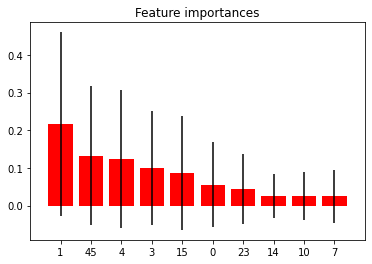

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[0:10]],
        color="r", yerr=std[indices[0:10]], align="center")
plt.xticks(range(10), indices[0:10])
plt.xlim([-1, 10])
plt.show()
# xgb.plot_importance(clf)

Variance is really high -> overfit model

In [16]:
y_test_pred_result = y_test_pred/5
y_test_pred_result

array([0.50690849, 0.45757084, 0.23945566, ..., 0.45643193, 0.27819659,
       0.27061877])

In [17]:
y_test_pred_result

array([0.50690849, 0.45757084, 0.23945566, ..., 0.45643193, 0.27819659,
       0.27061877])

In [100]:
result = pd.DataFrame()
result['id'] = test_df['id']
result['label'] = y_test_pred_result

In [101]:
result.to_csv('results.csv', index=False, header=None)

# Stacking part

In [33]:
from sklearn.model_selection import train_test_split

In [74]:
X_strain, X_sval, y_strain, y_sval = train_test_split(X_train, y_train, test_size=0.3, shuffle=False)

In [75]:
X_strain

array([[ 4.500e+01,  1.500e+01,  8.000e+00, ...,  0.000e+00,  6.010e+00,
         0.000e+00],
       [ 9.790e+02,  3.900e+01,  1.380e+02, ...,  0.000e+00,  1.024e+01,
         1.000e+00],
       [ 8.500e+01,  1.300e+01,  6.100e+01, ...,  0.000e+00,  6.960e+00,
        -1.000e+00],
       ...,
       [ 2.600e+01,  1.000e+00, -9.990e+02, ...,  0.000e+00,  7.320e+00,
         0.000e+00],
       [ 3.770e+02,  1.190e+02,  1.900e+03, ...,  0.000e+00,  9.090e+00,
         0.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  1.140e+01,
         0.000e+00]])

In [81]:
# clf = RandomForestClassifier(n_estimators=100, 
#                              random_state=1111,
#                              max_depth=3)
clf =  KNeighborsClassifier(n_neighbors=5)

In [82]:
clf.fit(X_strain, y_strain)

KNeighborsClassifier()

In [83]:
y_sval_pred = clf.predict_proba(X_sval)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

In [84]:
# pd.DataFrame(y_sval_pred, columns=["y_sval_pred_rf"]).to_csv('ensemble/y_sval_pred_rf.csv', index=False)
# pd.DataFrame(y_test_pred, columns=["y_test_pred_rf"]).to_csv('ensemble/y_test_pred_rf.csv', index=False)
pd.DataFrame(y_sval_pred, columns=["y_sval_pred_knn"]).to_csv('ensemble/y_sval_pred_knn.csv', index=False)
pd.DataFrame(y_test_pred, columns=["y_test_pred_knn"]).to_csv('ensemble/y_test_pred_knn.csv', index=False)

In [80]:
pd.DataFrame(y_sval, columns=["y_sval"]).to_csv('ensemble/y_sval.csv', index=False)
y_sval

array([0, 0, 0, ..., 1, 1, 0])